## Import Important Library

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import joblib

# for KNN ML
from sklearn.neighbors import NearestNeighbors

# for neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

## Import Dataset & Simple Cleansing Dataset

In [ ]:
url_1 = "https://docs.google.com/spreadsheets/d/1W7bff2v6O8XYs5roqY-7SJayrw6LtcBV0OA7N7ojies/edit?usp=sharing"

# Extracting the document ID and sheet ID
doc_id = url_1.split("/")[5]
url_1_trf = f"https://docs.google.com/spreadsheets/d/{doc_id}/gviz/tq?tqx=out:csv"

df1 = pd.read_csv(url_1_trf) # dataframe tourism rating

url_2 = "https://docs.google.com/spreadsheets/d/1ZMHWssUD3CM3T3-_PLkYov31Wc4qI-EmbXOSlRBnPtA/edit?usp=sharing"

# Extracting the document ID and sheet ID
doc_id = url_2.split("/")[5]
url_2_trf = f"https://docs.google.com/spreadsheets/d/{doc_id}/gviz/tq?tqx=out:csv"

df2 = pd.read_csv(url_2_trf) # dataframe tourism with id

url_3 = "https://docs.google.com/spreadsheets/d/1uQiY8YrKgM3lEUBlg5y4A5NxrpR7aT1mykPkHionev0/edit?usp=sharing"

# Extracting the document ID and sheet ID
doc_id = url_3.split("/")[5]
url_3_trf = f"https://docs.google.com/spreadsheets/d/{doc_id}/gviz/tq?tqx=out:csv"

df3 = pd.read_csv(url_3_trf)

raw = pd.merge(df1, df3, on='User_Id')
df = pd.merge(df2, raw, on='Place_Id')

df = pd.merge(df2, raw, on='Place_Id').drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Lat', 'Coordinate', 'Long'])

In [ ]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,User_Id,Place_Ratings,Location,Age
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,36,4,"Solo, Jawa Tengah",20
1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,38,2,"Serang, Banten",26
2,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,64,2,"Bandung, Jawa Barat",38
3,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,74,2,"Semarang, Jawa Tengah",30
4,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,86,4,"Depok, Jawa Barat",32


In [ ]:
df['Rating'].value_counts()

4.5    2305
4.4    2231
4.6    1769
4.3    1044
4.7     783
4.2     453
4.1     438
4.0     395
4.8     260
5.0      96
4.9      90
3.9      64
3.8      49
3.4      23
Name: Rating, dtype: int64

In [ ]:
Total = df.isnull().sum().sort_values(ascending=False)

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
Time_Minutes,5372,53.72
Place_Id,0,0.00
Place_Name,0,0.00
Description,0,0.00
Category,0,0.00
City,0,0.00
Price,0,0.00
Rating,0,0.00
User_Id,0,0.00
Place_Ratings,0,0.00


In [ ]:
df = df.drop(columns='Time_Minutes')

# Recommendation System using Top Place

In [ ]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,36,4,"Solo, Jawa Tengah",20
18,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,2,5,"Bekasi, Jawa Barat",21
43,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,17,2,"Semarang, Jawa Tengah",31
62,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,4,4,"Bekasi, Jawa Barat",21
83,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,1,5,"Semarang, Jawa Tengah",20


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates(subset=['Place_Id'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,36,4,"Solo, Jawa Tengah",20
18,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,2,5,"Bekasi, Jawa Barat",21
43,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,17,2,"Semarang, Jawa Tengah",31
62,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,4,4,"Bekasi, Jawa Barat",21
83,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,1,5,"Semarang, Jawa Tengah",20


In [ ]:
df.shape

(437, 11)

In [ ]:
df['Place_Id'].nunique()

437

In [ ]:
top_k = df.copy()

In [ ]:
top_k = top_k[['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price', 'Place_Ratings']]

In [ ]:
top_k = top_k.sort_values('Place_Ratings', ascending=False)
top_k.head(10)

,Place_Id,Place_Name,Description,Category,City,Price,Place_Ratings
9962,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,5
6526,287,Puspa Iptek Sundial,Puspa Iptek Sundial adalah wahana pendidikan y...,Taman Hiburan,Bandung,25000,5
2657,116,Jurang Tembelan Kanigoro,Jurang Tembelan Kanigoro berada di Desa Wisata...,Taman Hiburan,Yogyakarta,2500,5
5805,255,Museum Barli,Museum Barli adalah sebuah museum yang terleta...,Budaya,Bandung,15000,5
2606,114,The Lost World Castle,The Lost World Castle merupakan salah satu obj...,Taman Hiburan,Yogyakarta,30000,5
5869,258,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,5
5893,259,Monumen Perjuangan Rakyat Jawa Barat,Monumen Perjuangan Rakyat Jawa Barat (Monju) a...,Budaya,Bandung,0,5
2522,110,Monumen Serangan Umum 1 Maret,Monumen Serangan Umum 1 Maret berada di area s...,Taman Hiburan,Yogyakarta,3000,5
5922,260,Museum Pos Indonesia,Museum Pos Indonesia telah ada sejak masa Hind...,Budaya,Bandung,0,5
6032,265,Museum Mandala Wangsit Siliwangi,Museum Wangsit Mandala Siliwangi adalah museum...,Budaya,Bandung,0,5


# Collaborative Filtering Using KNN

In [ ]:
user_item_matrix = df.pivot_table(index = "User_Id", columns="Place_Id", values="Rating", fill_value=0)

In [ ]:
# Train the KNN model
knn_model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
knn_model.fit(user_item_matrix.values.T)

NearestNeighbors(algorithm='ball_tree')

In [ ]:
def recommend_places(user_id, num_recommendations=5):
    user_idx = user_item_matrix.index.get_loc(user_id)
    distances, indices = knn_model.kneighbors(user_item_matrix.values.T[user_idx].reshape(1, -1), n_neighbors=num_recommendations+1)
    recommendations = []

    for idx in indices[0]:
        place_id = user_item_matrix.columns[idx]
        if place_id not in user_item_matrix[user_id].index:
            recommendations.append(place_id)

    return recommendations

In [ ]:
user_id = 121  # Replace with the actual user ID
num_recommendations = 5  # Number of recommendations

recommendations = recommend_places(user_id, num_recommendations)

recommended_places_data = df[df["Place_Id"].isin(recommendations)]

recommended_df = recommended_places_data[["Place_Name", "City", "Category", "Price"]]
recommended_df = recommended_df.drop_duplicates()

print("Recommended Places for User:", user_id)
recommended_df

Recommended Places for User: 121


,Place_Name,City,Category,Price
8267,Pantai Maron,Semarang,Bahari,5000
8912,Durian Gardens and Tourism Education Watu Simbar,Semarang,Cagar Alam,5000


In [ ]:
df[df['Place_Id'] == user_id]['Category'].value_counts()

Budaya    20
Name: Category, dtype: int64

In [ ]:
# Get recommended places
recommendations = recommend_places(user_id, num_recommendations)

# Get actual places the user has rated
actual_places = df[df["User_Id"] == user_id]["Place_Id"].tolist()

# Calculate recall
relevant_recommendations = len(set(recommendations) & set(actual_places))
total_relevant_items = len(actual_places)

recall = relevant_recommendations / total_relevant_items

print("Recall:", recall)

Recall: 0.0


# Recommendation system using surprise

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811596 sha256=7044002186ae73503829b309a2e80cdfb393afef9266b86fd94d649b50a46c78
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['User_Id', 'Place_Id', 'Rating']], reader)

In [ ]:
benchmark = []
# Iterate over all algorithms

algorithms = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

print ("Attempting: ", str(algorithms), '\n\n\n')

for algorithm in algorithms:
    print("Starting: " ,str(algorithm))
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    # results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    print("Done: " ,str(algorithm), "\n\n")

print ('\n\tDONE\n')

Attempting:  [<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7b86507e5e40>, <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7b86507e5e10>, <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7b86507e5f60>, <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7b86507e5f90>, <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7b86507e5f00>, <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7b86507e5720>, <surprise.prediction_algorithms.knns.KNNBasic object at 0x7b86507e58a0>, <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7b86507e5780>, <surprise.prediction_algorithms.knns.KNNWithZScore object at 0x7b86507e5270>, <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7b86507e51b0>, <surprise.prediction_algorithms.co_clustering.CoClustering object at 0x7b86507e5030>] 



Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7b86507

In [ ]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBasic,6.533798e-16,0.006451,0.071070
KNNBaseline,1.154611e-02,0.017616,0.094378
KNNWithMeans,4.798598e-02,0.017421,0.104395
SVDpp,6.201678e-02,0.534175,0.225593
KNNWithZScore,6.592440e-02,0.021775,0.076808
BaselineOnly,8.774761e-02,0.015686,0.012189
SVD,1.153108e-01,0.163230,0.036684
SlopeOne,1.969494e-01,0.022647,0.080550
NMF,2.417187e-01,0.147439,0.023780


In [ ]:
# param_grid = {
#     "n_epochs": [5, 10, 15, 20, 30, 40, 50, 100],
#     "lr_all": [0.001, 0.002, 0.005],
#     "reg_all": [0.02, 0.08, 0.4, 0.6]
# }

# smaller grid for testing
param_grid = {
    "n_epochs": [10, 20],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.02]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], refit=True, cv=5)

gs.fit(data)

training_parameters = gs.best_params["rmse"]

print("BEST RMSE: \t", gs.best_score["rmse"])
print("BEST MAE: \t", gs.best_score["mae"])
print("BEST params: \t", gs.best_params["rmse"])

BEST RMSE: 	 0.10661797098178463
BEST MAE: 	 0.0840333864375126
BEST params: 	 {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}


## SVD++ Surprise

In [ ]:
label_encoder = LabelEncoder()

df['Location_Encoded'] = label_encoder.fit_transform(df['Location'])

print("Location Encoding Mapping:")
for original, encoded in zip(df['Location'], df['Location_Encoded']):
    print(f"{original} -> {encoded}")

Streaming output truncated to the last 5000 lines.
Serang, Banten -> 21
Yogyakarta, DIY -> 27
Depok, Jawa Barat -> 5
Jakarta Pusat, DKI Jakarta -> 7
Semarang, Jawa Tengah -> 20
Sragen, Jawa Tengah -> 23
Ponorogo, Jawa Timur -> 18
Klaten, Jawa Tengah -> 12
Bekasi, Jawa Barat -> 1
Bekasi, Jawa Barat -> 1
Lampung, Sumatera Selatan -> 14
Ponorogo, Jawa Timur -> 18
Semarang, Jawa Tengah -> 20
Subang, Jawa Barat -> 24
Serang, Banten -> 21
Bekasi, Jawa Barat -> 1
Bekasi, Jawa Barat -> 1
Yogyakarta, DIY -> 27
Bekasi, Jawa Barat -> 1
Tanggerang, Banten -> 26
Cilacap, Jawa Tengah -> 3
Karawang, Jawa Barat -> 11
Semarang, Jawa Tengah -> 20
Lampung, Sumatera Selatan -> 14
Semarang, Jawa Tengah -> 20
Jakarta Barat, DKI Jakarta -> 6
Bogor, Jawa Barat -> 2
Sragen, Jawa Tengah -> 23
Bogor, Jawa Barat -> 2
Bogor, Jawa Barat -> 2
Jakarta Selatan, DKI Jakarta -> 8
Tanggerang, Banten -> 26
Kota Gede, DIY -> 13
Yogyakarta, DIY -> 27
Tanggerang, Banten -> 26
Depok, Jawa Barat -> 5
Semarang, Jawa Tengah -> 2

In [ ]:
df.sample()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age,Location_Encoded
8286,363,Pantai Maron,"Pantai Maron (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦺꦴꦤ꧀, tran...",Bahari,Semarang,5000,3.4,261,3,"Yogyakarta, DIY",38,27


In [ ]:
from surprise import Dataset, Reader, SVDpp
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))

In [ ]:
data = Dataset.load_from_df(df[['User_Id', 'Place_Id', 'Rating', 'Age', 'Location_Encoded']], reader)


ValueError: ignored

# Content Based Filtering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.drop_duplicates(subset=['Place_Name'])

In [ ]:
df1.shape

(437, 11)

In [ ]:
df1.sample()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age
9612,422,Monumen Jalesveva Jayamahe,Monumen Jalesveva Jayamahe atau Monjaya adalah...,Budaya,Surabaya,0,4.6,13,4,"Depok, Jawa Barat",18


In [ ]:
tf = TfidfVectorizer()

df1 = df1.drop_duplicates(subset=['Place_Name'])

tfidf_matrix = tf.fit(df1['City'] + ' ' + df1['Category'])


In [ ]:
tfidf_matrix

TfidfVectorizer()

In [ ]:
joblib.dump(tfidf_matrix, "vectorizer.pkl")

['vectorizer.pkl']

In [ ]:
tfidf_matrix = tf.transform(df1['City'] + ' ' + df1['Category'])

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)

cosine_sim_df = pd.DataFrame(cosine_sim, index=df1['Place_Name'], columns=df1['Place_Name'])

In [ ]:
def place_recommendations(place_name, similarity_data=cosine_sim_df, items=df1[['Place_Name', 'Description','Category','City', 'Price']], k=10):

    user_place_sim = cosine_sim_df[place_name]
    closest_indices = user_place_sim.to_numpy().argsort()[::-1][1:k+1]
    recommendations = df1.iloc[closest_indices][['Place_Name', 'Description', 'Category', 'City', 'Price']]

    return recommendations

In [ ]:
place_recommendations('Surabaya North Quay')

,Place_Name,Description,Category,City,Price
9064,Taman Buah Surabaya,Wisata Taman Buah Undaan di Surabaya adalah sa...,Taman Hiburan,Surabaya,0
9940,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0
9348,Ciputra Waterpark,Ciputra Waterpark Surabaya – Bermain air di wa...,Taman Hiburan,Surabaya,95000
9284,Taman Ekspresi Dan Perpustakaan,Taman Ekspresi Surabaya tidak hanya menyuguhka...,Taman Hiburan,Surabaya,0
9228,Surabaya North Quay,Surabaya menjadi kota besar yang sering menjad...,Taman Hiburan,Surabaya,50000
9208,Kenjeran Park,Kenjeran Park merupakan salah satu tempat wisa...,Taman Hiburan,Surabaya,35000
9191,Taman Barunawati,Taman Barunawati yang lokasinya berada di kota...,Taman Hiburan,Surabaya,0
9132,Taman Keputran,"Ntah, mengapa nama taman ini disebut dengan ta...",Taman Hiburan,Surabaya,0
9684,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000
9092,Taman Pelangi,Kalau pelangi biasanya ada di siang hari pasca...,Taman Hiburan,Surabaya,0


# Collaborative Filtering Using Neural Network

In [ ]:
place_ids = df['Place_Id'].unique().tolist()
user_ids = df['User_Id'].unique().tolist()

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded userID :  {36: 0, 38: 1, 64: 2, 74: 3, 86: 4, 100: 5, 105: 6, 118: 7, 159: 8, 162: 9, 167: 10, 169: 11, 187: 12, 189: 13, 227: 14, 235: 15, 254: 16, 265: 17, 2: 18, 17: 19, 30: 20, 43: 21, 46: 22, 56: 23, 57: 24, 59: 25, 75: 26, 94: 27, 98: 28, 110: 29, 134: 30, 137: 31, 154: 32, 160: 33, 175: 34, 188: 35, 203: 36, 217: 37, 231: 38, 292: 39, 295: 40, 55: 41, 97: 42, 185: 43, 190: 44, 206: 45, 220: 46, 240: 47, 242: 48, 255: 49, 267: 50, 280: 51, 285: 52, 4: 53, 5: 54, 6: 55, 26: 56, 53: 57, 91: 58, 108: 59, 111: 60, 113: 61, 127: 62, 143: 63, 150: 64, 171: 65, 205: 66, 247: 67, 276: 68, 288: 69, 290: 70, 1: 71, 11: 72, 12: 73, 35: 74, 87: 75, 92: 76, 103: 77, 106: 78, 109: 79, 116: 80, 120: 81, 139: 82, 179: 83, 183: 84, 212: 85, 222: 86, 226: 87, 232: 88, 238: 89, 23: 90, 31: 91, 65: 92, 68: 93, 81: 94, 90: 95, 95: 96, 104: 97, 129: 98, 156: 99, 161: 100, 170: 101, 182: 102, 184: 103, 258: 104, 264: 105, 294: 106, 296: 107, 78: 108, 101: 109, 107: 110, 123: 111, 126: 112, 142:

In [ ]:
# Melakukan proses encoding placeID
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

# Melakukan proses encoding angka ke placeID
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

In [ ]:
# Mapping userID ke dataframe user
df['user'] = df['User_Id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [ ]:
df['user'] = df['User_Id']
df['place'] = df['Place_Id']

In [ ]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age,user,place
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,36,4,"Solo, Jawa Tengah",20,36,1
1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,38,2,"Serang, Banten",26,38,1
2,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,64,2,"Bandung, Jawa Barat",38,64,1
3,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,74,2,"Semarang, Jawa Tengah",30,74,1
4,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,86,4,"Depok, Jawa Barat",32,86,1


In [ ]:
df[df['User_Id'] == 92]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age,user,place
92,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,92,3,"Cirebon, Jawa Barat",39,92,5
161,8,Ocean Ecopark,Ocean Ecopark Salah satu zona rekreasi Ancol y...,Taman Hiburan,Jakarta,180000,4.0,92,5,"Cirebon, Jawa Barat",39,92,8
1371,60,Museum Tekstil,Museum cinta Tekstil menempati gedung tua di J...,Budaya,Jakarta,5000,4.5,92,3,"Cirebon, Jawa Barat",39,92,60
1384,61,Tugu Proklamasi,Tugu Proklamasi adalah tugu peringatan proklam...,Budaya,Jakarta,0,4.6,92,5,"Cirebon, Jawa Barat",39,92,61
1415,62,Taman Legenda Keong Emas,Taman Legenda Keong Emas merupakan salah satu ...,Taman Hiburan,Jakarta,30000,4.5,92,1,"Cirebon, Jawa Barat",39,92,62
1560,69,Freedom Library,Freedom Library adalah perpustakaan buku yang ...,Budaya,Jakarta,0,5.0,92,4,"Cirebon, Jawa Barat",39,92,69
1972,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,92,1,"Cirebon, Jawa Barat",39,92,87
2230,97,Monumen Yogya Kembali,Museum Monumen Yogya Kembali (bahasa Jawa: ꦩꦺꦴ...,Budaya,Yogyakarta,15000,4.5,92,5,"Cirebon, Jawa Barat",39,92,97
2415,105,Candi Donotirto,"Walaupun melekat dengan kata candi, Candi Dono...",Budaya,Yogyakarta,0,4.4,92,5,"Cirebon, Jawa Barat",39,92,105
2864,126,Pantai Goa Cemara,Pantai Goa Cemara (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ ꦒꦸꦮ​ ꦕ...,Bahari,Yogyakarta,4000,4.3,92,3,"Cirebon, Jawa Barat",39,92,126


In [ ]:
user = 92
user = str(user)

In [ ]:
user_data = df[df['User_Id'] == user]
if not user_data.empty:
    age_encoded = user_data.iloc[0]['Age'].astype('int')
    location_encoded = user_data.iloc[0]['Location']

In [ ]:
age_encoded

39

In [ ]:
type(user)

str

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Place_Id       10000 non-null  int64  
 1   Place_Name     10000 non-null  object 
 2   Description    10000 non-null  object 
 3   Category       10000 non-null  object 
 4   City           10000 non-null  object 
 5   Price          10000 non-null  int64  
 6   Rating         10000 non-null  float64
 7   User_Id        10000 non-null  int64  
 8   Place_Ratings  10000 non-null  int64  
 9   Location       10000 non-null  object 
 10  Age            10000 non-null  int64  
 11  user           10000 non-null  int64  
 12  place          10000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.1+ MB


In [ ]:
label_encoder = LabelEncoder()

encoder = label_encoder.fit(df['Location'])

In [ ]:
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

In [ ]:
test = joblib.load('/content/encoder.pkl')

In [ ]:
location = ["Yogyakarta, DIY"]

In [ ]:
halo = test.transform(location)

In [ ]:
halo[0]

27

In [ ]:
df['Location_Encoded'] = label_encoder.fit_transform(df['Location'])

print("Location Encoding Mapping:")
for original, encoded in zip(df['Location'], df['Location_Encoded']):
    print(f"{original} -> {encoded}")

Streaming output truncated to the last 5000 lines.
Serang, Banten -> 21
Yogyakarta, DIY -> 27
Depok, Jawa Barat -> 5
Jakarta Pusat, DKI Jakarta -> 7
Semarang, Jawa Tengah -> 20
Sragen, Jawa Tengah -> 23
Ponorogo, Jawa Timur -> 18
Klaten, Jawa Tengah -> 12
Bekasi, Jawa Barat -> 1
Bekasi, Jawa Barat -> 1
Lampung, Sumatera Selatan -> 14
Ponorogo, Jawa Timur -> 18
Semarang, Jawa Tengah -> 20
Subang, Jawa Barat -> 24
Serang, Banten -> 21
Bekasi, Jawa Barat -> 1
Bekasi, Jawa Barat -> 1
Yogyakarta, DIY -> 27
Bekasi, Jawa Barat -> 1
Tanggerang, Banten -> 26
Cilacap, Jawa Tengah -> 3
Karawang, Jawa Barat -> 11
Semarang, Jawa Tengah -> 20
Lampung, Sumatera Selatan -> 14
Semarang, Jawa Tengah -> 20
Jakarta Barat, DKI Jakarta -> 6
Bogor, Jawa Barat -> 2
Sragen, Jawa Tengah -> 23
Bogor, Jawa Barat -> 2
Bogor, Jawa Barat -> 2
Jakarta Selatan, DKI Jakarta -> 8
Tanggerang, Banten -> 26
Kota Gede, DIY -> 13
Yogyakarta, DIY -> 27
Tanggerang, Banten -> 26
Depok, Jawa Barat -> 5
Semarang, Jawa Tengah -> 2

In [ ]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age,user,place,Location_Encoded
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,36,4,"Solo, Jawa Tengah",20,36,1,22
1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,38,2,"Serang, Banten",26,38,1,21
2,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,64,2,"Bandung, Jawa Barat",38,64,1,0
3,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,74,2,"Semarang, Jawa Tengah",30,74,1,20
4,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,86,4,"Depok, Jawa Barat",32,86,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Place_Id          10000 non-null  int64  
 1   Place_Name        10000 non-null  object 
 2   Description       10000 non-null  object 
 3   Category          10000 non-null  object 
 4   City              10000 non-null  object 
 5   Price             10000 non-null  int64  
 6   Rating            10000 non-null  float64
 7   User_Id           10000 non-null  int64  
 8   Place_Ratings     10000 non-null  int64  
 9   Location          10000 non-null  object 
 10  Age               10000 non-null  int64  
 11  user              10000 non-null  int64  
 12  place             10000 non-null  int64  
 13  Location_Encoded  10000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
min_rating = min(df['Rating'])

# Nilai maksimal rating
max_rating = max(df['Rating'])


# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['User_Id', 'Place_Id', "Age", "Location_Encoded"]].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[203 274  24  10]
 [126 206  32  24]
 [  7  77  39   8]
 ...
 [290 236  34   4]
 [199  38  18  24]
 [226 319  23  18]] [0.75   0.625  0.625  ... 0.75   0.75   0.5625]


In [ ]:
print(len(x_train) + len(y_train), len(x_val) + len(y_val))

16000 4000


In [ ]:
class RecommenderNet(tf.keras.Model):

    def __init__(self, num_users, num_place, num_age_categories, num_encoded_locations, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_place = num_place
        self.embedding_size = embedding_size

        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.place_embedding = layers.Embedding(
            num_place,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.place_bias = layers.Embedding(num_place, 1)

        self.age_embedding = layers.Embedding(
            num_age_categories,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        self.location_embedding = layers.Embedding(
            num_encoded_locations,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        self.flatten = layers.Flatten()  # Flatten layer to convert embeddings to a 1D vector
        self.concat = layers.Concatenate(axis=1)  # Concatenate layer to combine all features

        self.dense1 = layers.Dense(128, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])

        place_vector = self.place_embedding(inputs[:, 1])
        place_bias = self.place_bias(inputs[:, 1])

        age_vector = self.age_embedding(inputs[:, 2])

        location_vector = self.location_embedding(inputs[:, 3])

        combined_features = self.concat([user_vector, place_vector, age_vector, location_vector])

        x = self.flatten(combined_features)
        x = self.dense1(x)
        x = self.output_layer(x)

        return x

In [ ]:
# Mendapatkan jumlah user
num_users = len(df['User_Id'])
print(num_users)

# Mendapatkan jumlah place
num_place = len(df['Place_Id'])
print(num_place)

num_age_categories = len(df['Age'])
print(num_age_categories)

num_encoded_locations = len(df['Location_Encoded'])
print(num_encoded_locations)

model = RecommenderNet(num_users, num_place, num_age_categories, num_encoded_locations,100) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adagrad(learning_rate=0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

10000
10000
10000
10000


In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
500/500 [==============================] - 24s 48ms/step - loss: 0.0169 - root_mean_squared_error: 0.1270 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1272
Epoch 2/10
500/500 [==============================] - 22s 44ms/step - loss: 0.0168 - root_mean_squared_error: 0.1265 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1268
Epoch 3/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0167 - root_mean_squared_error: 0.1260 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1262
Epoch 4/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0165 - root_mean_squared_error: 0.1254 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1256
Epoch 5/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0164 - root_mean_squared_error: 0.1248 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1250
Epoch 6/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0162 - root_mean_squared_error: 0.1240 - val_loss: 0

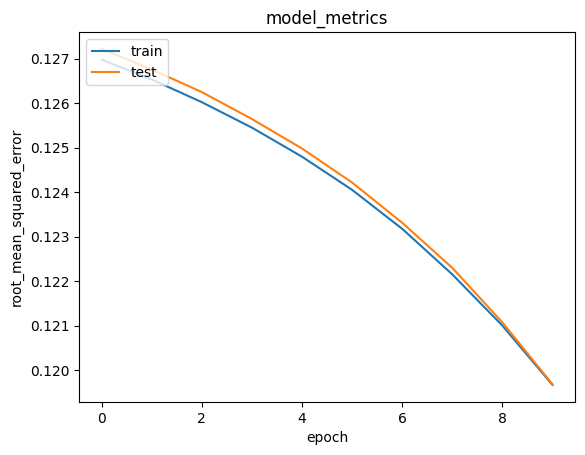

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# model.save('recommender_model', save_format='tf')

In [ ]:
# # solution load model if using save format 'tf'
# loaded_model = tf.keras.models.load_model('recommender_model')

In [ ]:
# # convert to zip
# import shutil

# shutil.make_archive('recommender_model', 'zip', 'recommender_model')

In [ ]:
# model.save_weights('recommender_model_weights.h5')

In [ ]:
# # Recreate the model's architecture
# model = RecommenderNet(num_users, num_place, num_age_categories, num_encoded_locations, 'embedding_size')

# # Load the saved weights
# model.load_weights('recommender_model_weights.h5')

## Testing model

In [ ]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age,user,place,Location_Encoded
6252,274,Babakan Siliwangi City Forest Path Bandung,Forest walk Babakan Siliwangi adalah fasilitas...,Cagar Alam,Bandung,0,4.6,203,2,"Jakarta Utara, DKI Jakarta",24,36,273,10
4684,206,Wisata Kaliurang,"Jogja selalu menarik untuk dikulik, terlebih t...",Cagar Alam,Yogyakarta,8000,4.4,126,5,"Subang, Jawa Barat",32,112,205,24
1731,77,Taman Hutan Tebet,"Taman Tebet dibangun tahun 1960, taman ini sem...",Taman Hiburan,Jakarta,0,4.4,7,5,"Jakarta Selatan, DKI Jakarta",39,169,76,8
4742,208,Taman Sungai Mudal,"Taman Sungai Mudal, sebuah objek wisata alam t...",Cagar Alam,Yogyakarta,10000,4.6,198,5,"Karawang, Jawa Barat",26,166,207,11
4521,199,Pantai Sedahan,Pantai Sedahan ini memiliki garis pantai yang ...,Bahari,Yogyakarta,5000,4.5,280,5,"Surabaya, Jawa Timur",40,51,198,25


In [ ]:
df1 = df.copy()

In [ ]:
df1.sample()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age,user,place,Location_Encoded
9111,400,Hutan Bambu Keputih,Surabaya menjadi kota metropolitan kedua setel...,Cagar Alam,Surabaya,0,4.3,65,1,"Yogyakarta, DIY",22,92,399,27


In [ ]:
df[df['User_Id'] == 92]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age,user,place,Location_Encoded
3857,171,Candi Ijo,"Candi Ijo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦆꦗꦺꦴ, translit. ...",Budaya,Yogyakarta,5000,4.6,92,5,"Cirebon, Jawa Barat",39,76,170,4
5196,228,Museum Sri Baduga,Museum Sri Baduga merupakan sebuah museum yang...,Budaya,Bandung,3000,4.5,92,4,"Cirebon, Jawa Barat",39,76,227,4
92,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,92,3,"Cirebon, Jawa Barat",39,76,4,4
5398,237,Panghegar Waterboom Bandung,Panghegar Waterboom Bandung merupakan salah sa...,Taman Hiburan,Bandung,75000,4.3,92,5,"Cirebon, Jawa Barat",39,76,236,4
2864,126,Pantai Goa Cemara,Pantai Goa Cemara (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ ꦒꦸꦮ​ ꦕ...,Bahari,Yogyakarta,4000,4.3,92,3,"Cirebon, Jawa Barat",39,76,125,4
9579,420,Surabaya Museum (Gedung Siola),Saat ini Museum Surabaya Siola menjelma menjad...,Budaya,Surabaya,0,4.5,92,5,"Cirebon, Jawa Barat",39,76,419,4
7917,346,Indonesia Kaya Park,Lokasi Taman Indonesia Kaya yang berada di pus...,Taman Hiburan,Semarang,0,4.6,92,3,"Cirebon, Jawa Barat",39,76,345,4
5641,248,NuArt Sculpture Park,NuArt Sculpture Park ini merupakan sebuah gall...,Taman Hiburan,Bandung,50000,4.7,92,4,"Cirebon, Jawa Barat",39,76,247,4
9237,405,Surabaya North Quay,Surabaya menjadi kota besar yang sering menjad...,Taman Hiburan,Surabaya,50000,4.4,92,5,"Cirebon, Jawa Barat",39,76,404,4
8814,385,Kampung Batik Gedong Semarang,Kampung Batik Semarang merupakan salah satu ka...,Budaya,Semarang,0,4.4,92,1,"Cirebon, Jawa Barat",39,76,384,4


In [ ]:
df[df['Location_Encoded'] == 27]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,User_Id,Place_Ratings,Location,Age,user,place,Location_Encoded
2304,100,Taman Budaya Yogyakarta,Taman Budaya Yogyakarta (TBY) (Hanacaraka:ꦠꦩꦤ꧀...,Budaya,Yogyakarta,0,4.5,215,5,"Yogyakarta, DIY",23,215,100,27
4993,219,Tebing Karaton,Tebing Keraton atau Tebing Karaton merupakan s...,Cagar Alam,Bandung,15000,4.5,238,1,"Yogyakarta, DIY",30,238,219,27
3032,134,Desa Wisata Gamplong,Desa Wisata Gamplong adalah desa wisata keraji...,Taman Hiburan,Yogyakarta,10000,4.4,138,3,"Yogyakarta, DIY",25,138,134,27
107,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,238,2,"Yogyakarta, DIY",30,238,5,27
7438,326,Taman Kupu-Kupu Cihanjuang,"Taman Kupu-Kupu Cihanjuang Bandung ini,seperti...",Cagar Alam,Bandung,10000,4.0,187,2,"Yogyakarta, DIY",25,187,326,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3843,170,Candi Borobudur,"Borobudur (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦧꦫꦧꦸꦝꦸꦂ, transli...",Budaya,Yogyakarta,50000,4.7,157,3,"Yogyakarta, DIY",28,157,170,27
1021,45,Jakarta Aquarium dan Safari,"Jika telah mengunjungi Seaworld Ancol, mungkin...",Taman Hiburan,Jakarta,185000,4.6,57,3,"Yogyakarta, DIY",21,57,45,27
3943,174,Pasar Beringharjo,"Pasar Beringharjo (bahasa Jawa: ꦥꦱꦂꦧꦼꦫꦶꦁꦲꦂꦗ, t...",Pusat Perbelanjaan,Yogyakarta,0,4.5,208,4,"Yogyakarta, DIY",27,208,174,27
7099,312,Taman Hutan Raya Ir. H. Juanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,11000,4.5,65,4,"Yogyakarta, DIY",22,65,312,27


In [ ]:
place_df = df

user_id = 92

place_visited_by_user = place_df[place_df['User_Id'] == user_id]['Place_Id']
place_not_visited = place_df[~place_df['Place_Id'].isin(place_visited_by_user)]['Place_Id']

place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
age_encoded = 22 # Provide the age_encoded value for user 92
location_encoded = 27 # Provide the location_encoded value for user 92
user_place_array = np.hstack(
    ([[user_encoder, age_encoded, location_encoded]] * len(place_not_visited), place_not_visited)
)

ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for user: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)
top_place_user = (
    place_df[place_df['Place_Id'].isin(place_visited_by_user)]
    .sort_values(by='Place_Ratings', ascending=False)
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['Place_Id'].isin(top_place_user)].drop_duplicates(subset=['Place_Id'])
for row in place_df_rows.itertuples():
    print(row.Place_Name, ':', row.City)

print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)
recommended_place = place_df[place_df['Place_Id'].isin(recommended_place_ids)].drop_duplicates(subset=['Place_Id'])
for row in recommended_place.itertuples():
    print(row.Place_Name, ':', row.City)

13/13 [==============================] - 0s 2ms/step
Showing recommendations for user: 92
Place with high ratings from user
--------------------------------
Air Terjun Semirang : Semarang
Freedom Library : Jakarta
Pantai Pulang Sawal : Yogyakarta
Observatorium Bosscha : Bandung
Desa Wisata Tembi : Yogyakarta
--------------------------------
Top 10 place recommendation
--------------------------------
Pecinan Glodok : Jakarta
Museum Wayang : Jakarta
Museum Pendidikan Nasional : Bandung
Desa Wisata Lembah Kalipancur : Semarang
Kota Mini : Bandung
Bukit Bintang : Bandung
Museum Pos Indonesia : Bandung
Museum Bank Indonesia : Jakarta
Taman Lansia : Bandung
Wisata Agro Edukatif Istana Susu Cibugary : Jakarta


In [ ]:
recommended_place_ids

[21, 18, 340, 333, 290, 251, 270, 113, 26, 323]

In [ ]:
model = RecommenderNet(num_users, num_place, num_age_categories, num_encoded_locations, 100)

# Call the model with dummy data to initialize the variables
dummy_input = tf.constant([[0, 0, 0, 0]], dtype=tf.int32)
_ = model(dummy_input)

model.load_weights('/content/recommender_model_weights.h5')

In [ ]:
model

In [ ]:
place_df = df

user_id = 92

place_visited_by_user = place_df[place_df['User_Id'] == user_id]['Place_Id']
place_not_visited = place_df[~place_df['Place_Id'].isin(place_visited_by_user)]['Place_Id']

place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
age_encoded = 25 # Provide the age_encoded value for user 92
location_encoded = 27 # Provide the location_encoded value for user 92
user_place_array = np.hstack(
    ([[user_encoder, age_encoded, location_encoded]] * len(place_not_visited), place_not_visited)
)

ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for user: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)
top_place_user = (
    place_df[place_df['Place_Id'].isin(place_visited_by_user)]
    .sort_values(by='Place_Ratings', ascending=False)
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['Place_Id'].isin(top_place_user)].drop_duplicates(subset=['Place_Id'])
for row in place_df_rows.itertuples():
    print(row.Place_Name, ':', row.City)

print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)
recommended_place = place_df[place_df['Place_Id'].isin(recommended_place_ids)].drop_duplicates(subset=['Place_Id'])
for row in recommended_place.itertuples():
    print(row.Place_Name, ':', row.City)

13/13 [==============================] - 0s 2ms/step
Showing recommendations for user: 92
Place with high ratings from user
--------------------------------
Air Terjun Semirang : Semarang
Freedom Library : Jakarta
Pantai Pulang Sawal : Yogyakarta
Observatorium Bosscha : Bandung
Desa Wisata Tembi : Yogyakarta
--------------------------------
Top 10 place recommendation
--------------------------------
Pecinan Glodok : Jakarta
Museum Wayang : Jakarta
Museum Pendidikan Nasional : Bandung
Gedung Agung Yogyakarta : Yogyakarta
Desa Wisata Lembah Kalipancur : Semarang
Kebun Tanaman Obat Sari Alam : Bandung
Kota Mini : Bandung
Bukit Bintang : Bandung
Museum Bank Indonesia : Jakarta
Taman Lansia : Bandung


# Neural Network Using other Params

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data_cf = df1.copy()
data_cf

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [ ]:
user_list_count = data_cf['User_Id'].unique().tolist()
print('list userID: ', user_list_count)

user_to_user_encoded = {x: i for i, x in enumerate(user_list_count)}
print('proses encode : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_list_count)}
print('encode ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
places_list_count = data_cf['Place_Id'].unique().tolist()

places_to_places_encoded = {x: i for i, x in enumerate(places_list_count)}

places_encoded_to_places = {i: x for i, x in enumerate(places_list_count)}

In [ ]:
data_cf['user'] = data_cf['User_Id'].map(user_to_user_encoded)

# Melakukan proses mapping 'PlaceID'
data_cf['places'] = data_cf['Place_Id'].map(places_to_places_encoded)

In [ ]:
# Melihat Jumlah User
total_user = len(user_to_user_encoded)
print(total_user)

# Melihat Jumlah places
total_places = len(places_encoded_to_places)
print(total_places)

data_cf['Place_Ratings'] = data_cf['Place_Ratings'].values.astype(np.float32)
min_rating = min(data_cf['Place_Ratings'])
max_rating = max(data_cf['Place_Ratings'])

print('Number of User: {}, Number of places: {}, Min Rating: {}, Max Rating: {}'.format(
    total_user, total_places, min_rating, max_rating
))

300
437
Number of User: 300, Number of places: 437, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
data_cf = data_cf.sample(frac=1, random_state=123)
data_cf

,User_Id,Place_Id,Place_Ratings,user,places
2656,82,33,4.0,81,66
445,15,417,3.0,14,177
9505,286,395,5.0,285,105
332,12,301,5.0,11,116
4168,127,418,2.0,126,304
...,...,...,...,...,...
9785,294,6,5.0,293,218
7763,233,246,1.0,232,22
5218,158,233,2.0,157,189
1346,42,84,2.0,41,305


In [ ]:
X = data_cf[['user', 'places']].values

# Membuat variabel y untuk membuat rating dari hasil
Y = data_cf['Place_Ratings'].apply(lambda X: (X - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data_cf.shape[0])
X_train, X_val, Y_train, Y_val = (
    X[:train_indices],
    X[train_indices:],
    Y[:train_indices],
    Y[train_indices:]
)

print(X, Y)

[[ 81  66]
 [ 14 177]
 [285 105]
 ...
 [157 189]
 [ 41 305]
 [108 369]] [0.75 0.5  1.   ... 0.25 0.25 0.  ]


In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, total_user, total_places, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.total_user = total_user
        self.total_places = total_places
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            total_user,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(total_user, 1)
        self.places_embedding = layers.Embedding(
            total_places,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.places_bias = layers.Embedding(total_places, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        places_vector = self.places_embedding(inputs[:, 1])
        places_bias = self.places_bias(inputs[:, 1])

        dot_user_places = tf.tensordot(user_vector, places_vector, 2)

        x = dot_user_places + user_bias + places_bias

        return tf.nn.sigmoid(x)


In [ ]:
model = RecommenderNet(total_user, total_places, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Training Process

hist = model.fit(
    x = X_train,  # Use lowercase 'x'
    y = Y_train,  # Use lowercase 'y'
    batch_size=8,
    epochs=100,
    validation_data=(X_val, Y_val)
)

Epoch 1/100
1000/1000 [==============================] - 5s 3ms/step - loss: 0.6941 - root_mean_squared_error: 0.3461 - val_loss: 0.6927 - val_root_mean_squared_error: 0.3445
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6866 - root_mean_squared_error: 0.3406 - val_loss: 0.6936 - val_root_mean_squared_error: 0.3451
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6799 - root_mean_squared_error: 0.3357 - val_loss: 0.6944 - val_root_mean_squared_error: 0.3457
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6751 - root_mean_squared_error: 0.3322 - val_loss: 0.6975 - val_root_mean_squared_error: 0.3478
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6715 - root_mean_squared_error: 0.3295 - val_loss: 0.6987 - val_root_mean_squared_error: 0.3486
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6683 - root_mean_squared_error: 0.3272 - val_l